# Lecture 15 Assignment
## Bernardo Gutierrez

a)
Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

b) Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online (e.g.https://www.researchgate.net/figure/Spectrogram-of-signal-CHIRP-source-wwwligoorg_fig2_328932008). (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


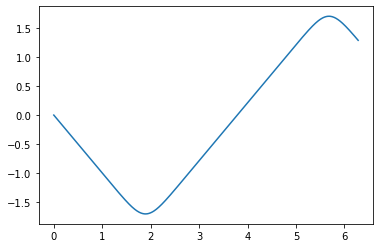

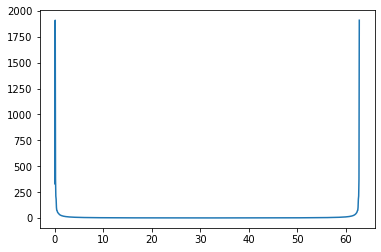

In [33]:
import matplotlib.pylab as p
from numpy import *
import numpy as np

# Initial Parameters
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):   # Force function 
    fReturn[0] = y[1]                                          
    fReturn[1] = -0.01*y[0]**11
    return fReturn

def rk4(t,h,n): #import an RK4 scheme
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    
tp=[]
tp.append(0)
while (t < b):   #time domain plot                                          
    if ((t + h) > b):
        h = b - t
    y = rk4(t,h,2)
    t = t + h
    tp.append(t)
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()
    
N=len(tp)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
step = 0.1

def fourier(signal):                                              # DFT
    for n in range(0, N):              
        zsum =complex(0.0, 0.0)                
        for k in range(0, N):                              
            zexpo=complex(0, 2.*pi*k*n/N)           # Complex exponent
            zsum+=signal[k]*exp(-zexpo)           
        dftz[n]=zsum * sqrt(2.*pi)      
        nplot[n] = n/N/step*2.*pi        # omega = n 2\pi /T = n 2\pi / (N *step)
        fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(yp)

p.plot(nplot,fplot)
p.show()

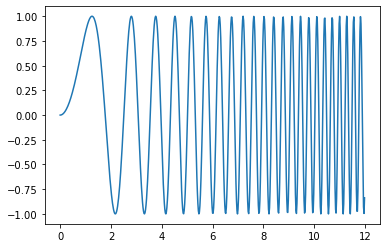

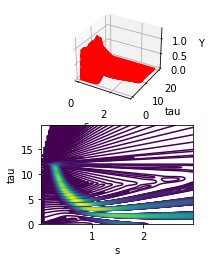

In [35]:
import matplotlib.pyplot as plt
from numpy import *
import scipy as sci

ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)  # s array
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep) # tau array
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    if(0<=t and t<=15):
        y=sin(t**2)
    else:
        t=0
    return y

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) # y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt):  # For each s and tau, integrate t for the wavelet transform
                ystau[idexs,idextau] +=np.conjugate(morlet((tar[idext]-tauar[idextau])/sar[idexs],1.))*yarr[idext]*dstep/np.sqrt(sar[idexs]) # please finish this line using "conjugate(morlet((tar[idext]-tauar[idextau])/sar[idexs],1.))" as the wavelet
                
wavelet()

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('s')
p.ylabel('tau')
p.show()
p.show()  